<a href="https://colab.research.google.com/github/Mikelbernard12/Mikelbernard12/blob/main/coffee_form_project_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scope

Caffeine Form is a company creating coffee cups from recycled material.
Caffeine Form sells cups to coffee shops through their website.
They would prefer to partner directly with the shops.
The company believes that stores with more reviews will help them to better market their product.
The company want to focus on the types of shop that get the most reviews.
Our objective is to report on how types of shop and number of reviews are related.


# Project steps

1. Source data from various online sources, download the data files onto your local storage under the project folder.
2. Import libraries needed for the project.
3. Read and describe details of the datasets.
4. Clean the data and store the clean version of the data in a clean folder containing only the clean data files
5. Visualize the different relationships among variables and also, analyze these visualization.



# Data Source

- This dataset was obtained from Datacamp


# 1. Import libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# 2. Read and describe details of the datasets


## 2.1 Read the dataset


In [ ]:
coffee_df = pd.read_csv('D:/datasets/coffee_form/coffee.csv')
coffee_df.head(5)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


## 2.2 Describe details of the datasets

In [ ]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


The dataset consists of 9 columns, 200 entries. the columns are;
Region            
Place type   
Rating       
Reviews          
Price            
Delivery option    
Dine in option   
Takeout option   

Info about each columns:

 Region: This column contains the regions which are between A to J.
There are no missing values with 200 entries and an object datatype.

 Place name: Also, a column with no missing values with 200 entries and of the object datatype

 Place type: A column which consist of 200 entries and no missing values.
There are 4 shop type which are 'coffe shop', 'Cafe', 'Espresso bar' and 'Others' anything besides these shop type is filled with 'unknown'.

 There are 2 missing values each in Rating and Reviews columns.
the missing values in the Reviews column are replaced with the median value which is 271.5,
while that of the Rating table are filled with 0.

 Delivery option and Price are column with no missing entries out of the 200 entries.
There are 60 missing values in Dine in option column and 56 missing values in takeout option column.

 Checked if all the values within the table are same with those in the description using the isin() function on the dataset.
Proceeded with filling the null spaces in the table with the appropriate values.

 Proceeded with filling the null spaces in the table with the appropriate values by putting them in a dictionary and passing it into fillna() method.

In [ ]:
value = coffee_df.Reviews.median()
dict_replacement = {
 'Rating': 0,
 'Reviews': coffee_df.Reviews.median(),
 'Delivery option':'False',
 'Dine in option': 'False',
 'Takeout option': 'False'}
coffee_df.fillna(dict_replacement)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True
...,...,...,...,...,...,...,...,...,...
195,H,Artist,Others,4.6,963.0,$$$,False,True,True
196,H,Dream Cafe,Cafe,4.3,646.0,$$,False,True,True
197,H,РУТА КАФЕ ПП КУЛІЧЕНКО К.І.,Cafe,4.6,16.0,$$,False,True,True
198,H,Ob'yektna Kava,Coffee shop,4.7,599.0,$$,False,True,True


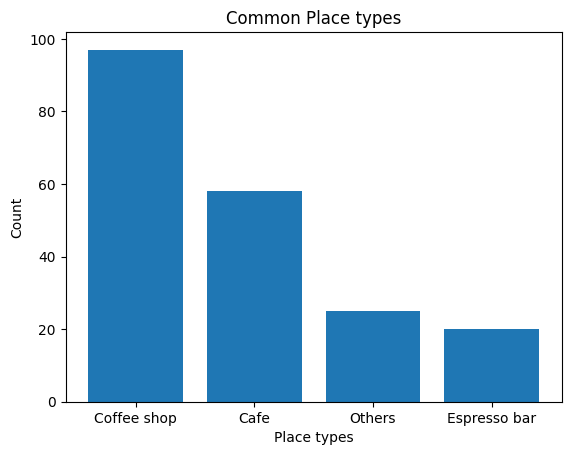

In [ ]:
w = len(coffee_df[coffee_df['Place type'] == 'Coffee shop'])
x = len(coffee_df[coffee_df['Place type'] == 'Cafe'])
y = len(coffee_df[coffee_df['Place type'] == 'Others'])
z = len(coffee_df[coffee_df['Place type'] == 'Espresso bar'])
market = [w,x,y,z]
lis = ['Coffee shop','Cafe','Others','Espresso bar']
plt.bar(lis, market)
plt.title('Common Place types')
plt.xlabel('Place types')
plt.ylabel('Count')
plt.show()


From the Common Place types bar chart above:
There are four possible types of store included in this data.
The most common type listed is a coffee shop, with cafe being second although with half the number of locations.
The categories are unbalanced, with most observations being either Coffee Shop or Cafe.
The team should focus on distributing their new cups in coffee shops as they are more common.

Looking at all reviews, we can see from the 'Count vs Number of reviews' histogram that most places have had less than 1000 reviews. The distribution of the number of reviews is right skewed. There are some outliers that get more than 2000 reviews but this is very uncommon.

When looking for places that have high reviews the team should aim for locations having over 1000 reviews, but be aware they may need to work with 500 reviews or more.

Text(0, 0.5, 'Count')

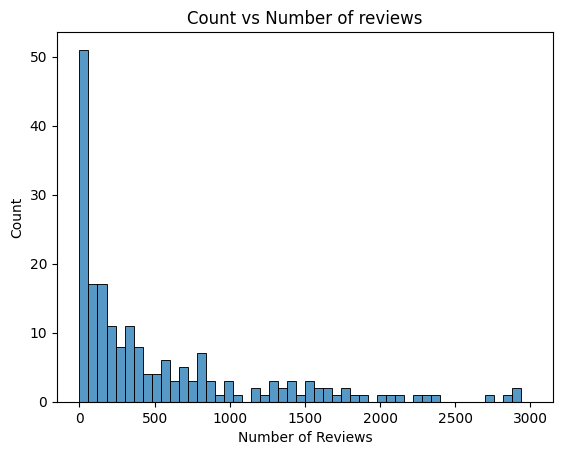

In [ ]:
sns.histplot(coffee_df['Reviews'],bins=50,binrange=(0,3000))
plt.title('Count vs Number of reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')

Finally we want to combine the two pieces of information to see how the place type impacts number of reviews. So far coffee shops with over 1000 reviews would be ideal but we need to look at the two variables together to see if this is realistic.

When looking at just the reviews we excluded a single outlying value so that we could see the majority of the data. To show the impact, we can look at the range of number of reviews by place with this outlier in the data. In the graphic below you can see that this outlier is dominating the data and making comparison difficult. To make it easier to compare the rest of the data, we will remove this outlier.

Text(0.5, 1.0, 'Reviews vs Place type')

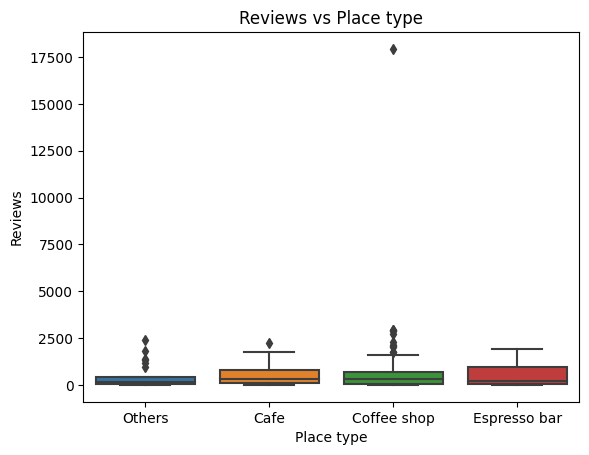

In [ ]:
sns.boxplot(data= coffee_df, x='Place type', y='Reviews')
plt.title('Reviews vs Place type')

After we remove the outlier we can focus on the main range of data. Although Coffee Shops do include the place types with the largest number of reviews, the interquartile range of the number of reviews is lower than Cafe and espresso bar types. This would suggest that the majority of the number of reviews may be lower than other types. However, this could also be an effect of having the largest number of locations, so the large number of low review locations brings the median down.

Text(0.5, 1.0, 'Reviews vs Place type')

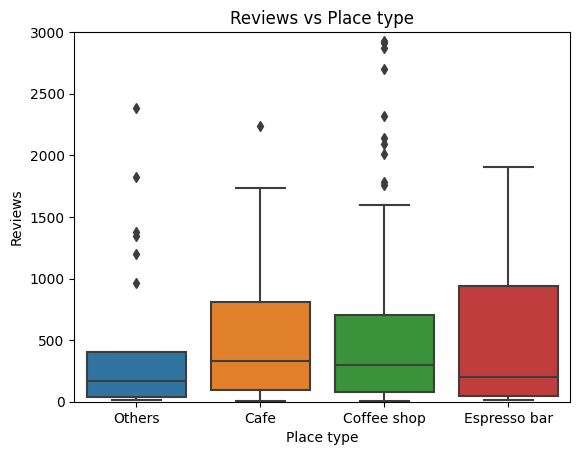

In [ ]:
ax = sns.boxplot(data= coffee_df, x='Place type', y='Reviews')
ax.set_ylim([0,3000])
plt.title('Reviews vs Place type')